In [29]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [30]:
df = pd.read_csv('trai.csv')

In [31]:
df.shape

(38932, 5)

In [32]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [34]:
df.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id10326,1
Description,38932,38932,The room was kind of clean but had a VERY stro...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


In [35]:
df.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

In [75]:
df.duplicated().sum()

0

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


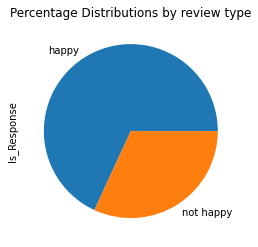

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
print(round(df.Is_Response.value_counts(normalize=True)*100,2))
round(df.Is_Response.value_counts(normalize=True)*100,2).plot(kind='pie')
plt.title('Percentage Distributions by review type')
plt.show()

In [37]:
df.drop(columns=['User_ID', 'Browser_Used','Device_Used'], inplace=True)

In [77]:
import re
import string


def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\W*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x) 

In [39]:
df['cleaned_description'] = pd.DataFrame(df.Description.apply(cleaned1))
df.head(10)
                            

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


In [40]:
def text_cleaned_2(text):
    text = re.sub('[''""...]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_cleaned_2(x)

In [43]:
df['cleaned_description_new'] = pd.DataFrame(df['cleaned_description'].apply(cleaned2))
df.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,wonderful staff great location but it was defi...


In [78]:
from sklearn.model_selection import train_test_split

X = df.cleaned_description_new
Y = df.Is_Response

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=225)

print('X_train :', len(X_train))
print('X_test  :', len(X_test))
print('Y_train :', len(Y_train))
print('Y_test  :',  len(Y_test))

X_train : 31145
X_test  : 7787
Y_train : 31145
Y_test  : 7787


In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver="lbfgs")

from sklearn.pipeline import Pipeline

In [80]:
model = Pipeline([('vectorizer', tvec), ('classifier', clf2)])

model.fit(X_train, Y_train)

from sklearn.metrics import confusion_matrix

predictions = model.predict(X_test)

confusion_matrix(predictions,Y_test)

array([[4954,  604],
       [ 297, 1932]], dtype=int64)

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, Y_test))
print("Precision : ", precision_score(predictions, Y_test, average='weighted'))
print("Recall : ", recall_score(predictions, Y_test, average='weighted') )

Accuracy :  0.8842943367150379
Precision :  0.8914542410954388
Recall :  0.8842943367150379


In [83]:
example = ["I'm laughing"]
result = model.predict(example)

print(result)

['happy']
